In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: VMC
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


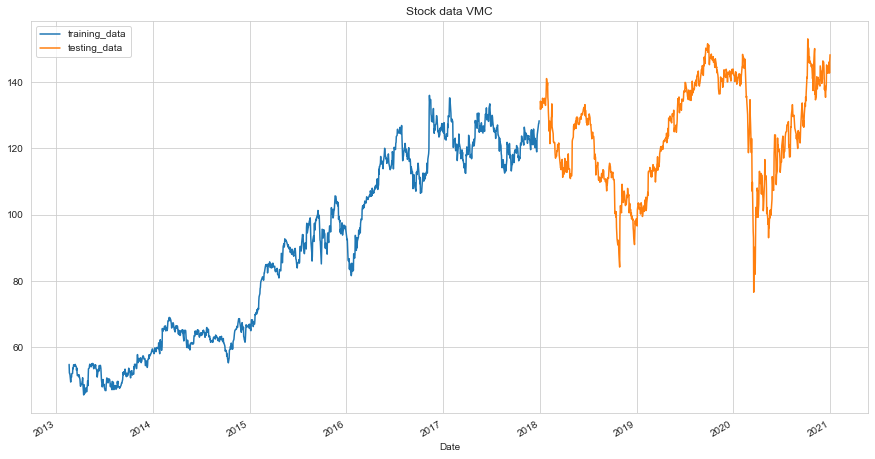

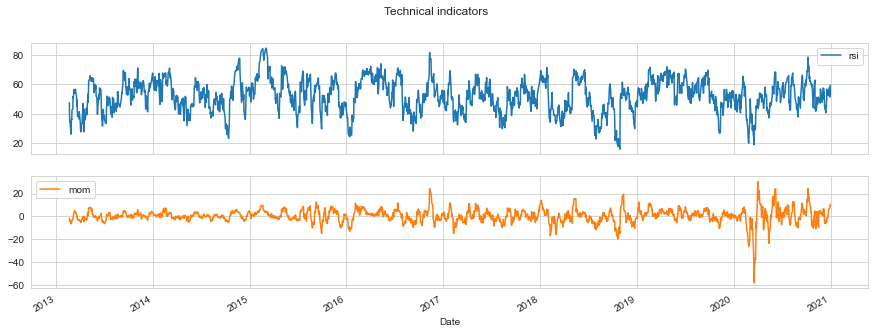

In [2]:
stock_name = 'vmc'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1505.66, duration: 0:00:00.523117
episode: 2/2000, episode end value: 1527.88, duration: 0:00:00.583137
episode: 3/2000, episode end value: 1529.81, duration: 0:00:00.509110
episode: 4/2000, episode end value: 1528.35, duration: 0:00:00.593138
episode: 5/2000, episode end value: 1530.72, duration: 0:00:00.565123
episode: 6/2000, episode end value: 1533.03, duration: 0:00:00.483109
episode: 7/2000, episode end value: 1530.81, duration: 0:00:00.545123
episode: 8/2000, episode end value: 1528.35, duration: 0:00:00.569129
episode: 9/2000, episode end value: 1523.64, duration: 0:00:00.540119
episode: 10/2000, episode end value: 1525.68, duration: 0:00:00.545124
episode: 11/2000, episode end value: 1531.20, duration: 0:00:00.633144
episode: 12/2000, episode end value: 1534.62, duration: 0:00:00.544122
episode: 13/2000, episode end value: 1523.92, duration: 0:00:00.608136
episode: 14/2000, episode end value: 1524.66, duration: 0:00:00.635144
episode: 15/200

episode: 117/2000, episode end value: 1543.66, duration: 0:00:00.447095
episode: 118/2000, episode end value: 1509.01, duration: 0:00:00.415094
episode: 119/2000, episode end value: 1528.05, duration: 0:00:00.527118
episode: 120/2000, episode end value: 1519.86, duration: 0:00:00.562129
episode: 121/2000, episode end value: 1522.63, duration: 0:00:00.447092
episode: 122/2000, episode end value: 1520.90, duration: 0:00:00.455103
episode: 123/2000, episode end value: 1522.99, duration: 0:00:00.515117
episode: 124/2000, episode end value: 1526.05, duration: 0:00:00.512117
episode: 125/2000, episode end value: 1522.96, duration: 0:00:00.477104
episode: 126/2000, episode end value: 1522.80, duration: 0:00:00.530120
episode: 127/2000, episode end value: 1524.14, duration: 0:00:00.529123
episode: 128/2000, episode end value: 1526.39, duration: 0:00:00.498107
episode: 129/2000, episode end value: 1512.09, duration: 0:00:00.416092
episode: 130/2000, episode end value: 1515.25, duration: 0:00:00

episode: 231/2000, episode end value: 1520.06, duration: 0:00:00.440099
episode: 232/2000, episode end value: 1521.47, duration: 0:00:00.473106
episode: 233/2000, episode end value: 1514.07, duration: 0:00:00.476110
episode: 234/2000, episode end value: 1520.24, duration: 0:00:00.458101
episode: 235/2000, episode end value: 1525.30, duration: 0:00:00.527126
episode: 236/2000, episode end value: 1518.41, duration: 0:00:00.429093
episode: 237/2000, episode end value: 1513.94, duration: 0:00:00.529117
episode: 238/2000, episode end value: 1507.80, duration: 0:00:00.495111
episode: 239/2000, episode end value: 1524.12, duration: 0:00:00.484105
episode: 240/2000, episode end value: 1520.70, duration: 0:00:00.502117
episode: 241/2000, episode end value: 1512.34, duration: 0:00:00.447100
episode: 242/2000, episode end value: 1508.14, duration: 0:00:00.397090
episode: 243/2000, episode end value: 1513.53, duration: 0:00:00.468103
episode: 244/2000, episode end value: 1514.28, duration: 0:00:00

episode: 345/2000, episode end value: 1527.98, duration: 0:00:00.456619
episode: 346/2000, episode end value: 1520.48, duration: 0:00:00.502300
episode: 347/2000, episode end value: 1505.60, duration: 0:00:00.389961
episode: 348/2000, episode end value: 1511.02, duration: 0:00:00.502820
episode: 349/2000, episode end value: 1520.75, duration: 0:00:00.491975
episode: 350/2000, episode end value: 1516.30, duration: 0:00:00.442098
episode: 351/2000, episode end value: 1513.71, duration: 0:00:00.489108
episode: 352/2000, episode end value: 1517.14, duration: 0:00:00.458101
episode: 353/2000, episode end value: 1520.03, duration: 0:00:00.469210
episode: 354/2000, episode end value: 1519.33, duration: 0:00:00.565451
episode: 355/2000, episode end value: 1521.83, duration: 0:00:00.573128
episode: 356/2000, episode end value: 1525.87, duration: 0:00:00.524118
episode: 357/2000, episode end value: 1521.28, duration: 0:00:00.499111
episode: 358/2000, episode end value: 1525.80, duration: 0:00:00

episode: 459/2000, episode end value: 1522.18, duration: 0:00:00.429095
episode: 460/2000, episode end value: 1524.34, duration: 0:00:00.497112
episode: 461/2000, episode end value: 1519.32, duration: 0:00:00.435098
episode: 462/2000, episode end value: 1517.18, duration: 0:00:00.538121
episode: 463/2000, episode end value: 1526.31, duration: 0:00:00.491088
episode: 464/2000, episode end value: 1522.48, duration: 0:00:00.491108
episode: 465/2000, episode end value: 1522.07, duration: 0:00:00.442098
episode: 466/2000, episode end value: 1528.87, duration: 0:00:00.541122
episode: 467/2000, episode end value: 1525.10, duration: 0:00:00.535121
episode: 468/2000, episode end value: 1527.09, duration: 0:00:00.512115
episode: 469/2000, episode end value: 1512.76, duration: 0:00:00.521113
episode: 470/2000, episode end value: 1519.02, duration: 0:00:00.497112
episode: 471/2000, episode end value: 1519.98, duration: 0:00:00.518113
episode: 472/2000, episode end value: 1511.43, duration: 0:00:00

episode: 573/2000, episode end value: 1521.67, duration: 0:00:00.473103
episode: 574/2000, episode end value: 1521.10, duration: 0:00:00.510120
episode: 575/2000, episode end value: 1515.56, duration: 0:00:00.483107
episode: 576/2000, episode end value: 1522.98, duration: 0:00:00.514116
episode: 577/2000, episode end value: 1525.79, duration: 0:00:00.486109
episode: 578/2000, episode end value: 1524.23, duration: 0:00:00.512116
episode: 579/2000, episode end value: 1518.78, duration: 0:00:00.493119
episode: 580/2000, episode end value: 1524.66, duration: 0:00:00.530123
episode: 581/2000, episode end value: 1521.49, duration: 0:00:00.548123
episode: 582/2000, episode end value: 1520.41, duration: 0:00:00.521120
episode: 583/2000, episode end value: 1526.58, duration: 0:00:00.527114
episode: 584/2000, episode end value: 1522.40, duration: 0:00:00.562126
episode: 585/2000, episode end value: 1524.42, duration: 0:00:00.495682
episode: 586/2000, episode end value: 1522.31, duration: 0:00:00

episode: 687/2000, episode end value: 1524.24, duration: 0:00:00.493112
episode: 688/2000, episode end value: 1519.70, duration: 0:00:00.559106
episode: 689/2000, episode end value: 1520.23, duration: 0:00:00.453577
episode: 690/2000, episode end value: 1529.73, duration: 0:00:00.468105
episode: 691/2000, episode end value: 1519.39, duration: 0:00:00.463084
episode: 692/2000, episode end value: 1523.86, duration: 0:00:00.496114
episode: 693/2000, episode end value: 1520.75, duration: 0:00:00.428751
episode: 694/2000, episode end value: 1526.91, duration: 0:00:00.414194
episode: 695/2000, episode end value: 1526.05, duration: 0:00:00.499115
episode: 696/2000, episode end value: 1521.15, duration: 0:00:00.458101
episode: 697/2000, episode end value: 1519.50, duration: 0:00:00.441098
episode: 698/2000, episode end value: 1532.48, duration: 0:00:00.535121
episode: 699/2000, episode end value: 1527.61, duration: 0:00:00.515120
episode: 700/2000, episode end value: 1515.99, duration: 0:00:00

episode: 801/2000, episode end value: 1564.13, duration: 0:00:00.434096
episode: 802/2000, episode end value: 1510.14, duration: 0:00:00.446100
episode: 803/2000, episode end value: 1521.90, duration: 0:00:00.513114
episode: 804/2000, episode end value: 1520.25, duration: 0:00:00.384089
episode: 805/2000, episode end value: 1528.64, duration: 0:00:00.472105
episode: 806/2000, episode end value: 1526.08, duration: 0:00:00.468112
episode: 807/2000, episode end value: 1531.88, duration: 0:00:00.563125
episode: 808/2000, episode end value: 1528.87, duration: 0:00:00.441101
episode: 809/2000, episode end value: 1518.69, duration: 0:00:00.491111
episode: 810/2000, episode end value: 1517.92, duration: 0:00:00.447100
episode: 811/2000, episode end value: 1522.95, duration: 0:00:00.526119
episode: 812/2000, episode end value: 1548.65, duration: 0:00:00.443100
episode: 813/2000, episode end value: 1511.41, duration: 0:00:00.488118
episode: 814/2000, episode end value: 1531.94, duration: 0:00:00

episode: 915/2000, episode end value: 1531.76, duration: 0:00:00.535122
episode: 916/2000, episode end value: 1521.81, duration: 0:00:00.499110
episode: 917/2000, episode end value: 1520.70, duration: 0:00:00.422094
episode: 918/2000, episode end value: 1519.54, duration: 0:00:00.378089
episode: 919/2000, episode end value: 1521.99, duration: 0:00:00.462105
episode: 920/2000, episode end value: 1522.15, duration: 0:00:00.457164
episode: 921/2000, episode end value: 1521.38, duration: 0:00:00.441097
episode: 922/2000, episode end value: 1517.64, duration: 0:00:00.431812
episode: 923/2000, episode end value: 1525.41, duration: 0:00:00.478164
episode: 924/2000, episode end value: 1523.55, duration: 0:00:00.470108
episode: 925/2000, episode end value: 1521.02, duration: 0:00:00.470103
episode: 926/2000, episode end value: 1521.77, duration: 0:00:00.531125
episode: 927/2000, episode end value: 1516.59, duration: 0:00:00.530118
episode: 928/2000, episode end value: 1517.85, duration: 0:00:00

episode: 1029/2000, episode end value: 1527.49, duration: 0:00:00.472106
episode: 1030/2000, episode end value: 1515.98, duration: 0:00:00.467107
episode: 1031/2000, episode end value: 1524.77, duration: 0:00:00.525118
episode: 1032/2000, episode end value: 1519.84, duration: 0:00:00.443097
episode: 1033/2000, episode end value: 1525.47, duration: 0:00:00.478106
episode: 1034/2000, episode end value: 1524.03, duration: 0:00:00.484112
episode: 1035/2000, episode end value: 1513.79, duration: 0:00:00.501115
episode: 1036/2000, episode end value: 1516.30, duration: 0:00:00.484105
episode: 1037/2000, episode end value: 1525.52, duration: 0:00:00.507115
episode: 1038/2000, episode end value: 1530.41, duration: 0:00:00.431096
episode: 1039/2000, episode end value: 1524.93, duration: 0:00:00.571130
episode: 1040/2000, episode end value: 1521.13, duration: 0:00:00.427097
episode: 1041/2000, episode end value: 1516.25, duration: 0:00:00.448103
episode: 1042/2000, episode end value: 1523.21, dur

episode: 1142/2000, episode end value: 1527.75, duration: 0:00:00.495112
episode: 1143/2000, episode end value: 1521.90, duration: 0:00:00.441097
episode: 1144/2000, episode end value: 1520.66, duration: 0:00:00.554125
episode: 1145/2000, episode end value: 1526.13, duration: 0:00:00.492116
episode: 1146/2000, episode end value: 1521.81, duration: 0:00:00.546115
episode: 1147/2000, episode end value: 1525.41, duration: 0:00:00.522120
episode: 1148/2000, episode end value: 1522.88, duration: 0:00:00.551124
episode: 1149/2000, episode end value: 1519.93, duration: 0:00:00.422095
episode: 1150/2000, episode end value: 1526.94, duration: 0:00:00.451096
episode: 1151/2000, episode end value: 1521.13, duration: 0:00:00.447097
episode: 1152/2000, episode end value: 1528.03, duration: 0:00:00.526125
episode: 1153/2000, episode end value: 1524.52, duration: 0:00:00.562120
episode: 1154/2000, episode end value: 1522.74, duration: 0:00:00.511120
episode: 1155/2000, episode end value: 1520.18, dur

episode: 1255/2000, episode end value: 1526.67, duration: 0:00:00.484107
episode: 1256/2000, episode end value: 1524.54, duration: 0:00:00.419093
episode: 1257/2000, episode end value: 1517.16, duration: 0:00:00.475105
episode: 1258/2000, episode end value: 1527.54, duration: 0:00:00.464110
episode: 1259/2000, episode end value: 1519.13, duration: 0:00:00.392087
episode: 1260/2000, episode end value: 1611.24, duration: 0:00:00.390086
episode: 1261/2000, episode end value: 1513.91, duration: 0:00:00.371089
episode: 1262/2000, episode end value: 1524.25, duration: 0:00:00.481104
episode: 1263/2000, episode end value: 1520.73, duration: 0:00:00.407091
episode: 1264/2000, episode end value: 1535.12, duration: 0:00:00.409097
episode: 1265/2000, episode end value: 1513.95, duration: 0:00:00.343077
episode: 1266/2000, episode end value: 1524.26, duration: 0:00:00.428092
episode: 1267/2000, episode end value: 1525.97, duration: 0:00:00.388090
episode: 1268/2000, episode end value: 1515.24, dur

episode: 1368/2000, episode end value: 1527.48, duration: 0:00:00.439096
episode: 1369/2000, episode end value: 1525.55, duration: 0:00:00.421094
episode: 1370/2000, episode end value: 1524.78, duration: 0:00:00.387088
episode: 1371/2000, episode end value: 1523.04, duration: 0:00:00.499112
episode: 1372/2000, episode end value: 1526.63, duration: 0:00:00.439097
episode: 1373/2000, episode end value: 1523.00, duration: 0:00:00.442103
episode: 1374/2000, episode end value: 1522.44, duration: 0:00:00.358077
episode: 1375/2000, episode end value: 1524.72, duration: 0:00:00.406093
episode: 1376/2000, episode end value: 1521.41, duration: 0:00:00.430095
episode: 1377/2000, episode end value: 1522.96, duration: 0:00:00.389087
episode: 1378/2000, episode end value: 1524.68, duration: 0:00:00.441098
episode: 1379/2000, episode end value: 1524.77, duration: 0:00:00.423094
episode: 1380/2000, episode end value: 1519.17, duration: 0:00:00.410094
episode: 1381/2000, episode end value: 1524.85, dur

episode: 1481/2000, episode end value: 1521.70, duration: 0:00:00.356076
episode: 1482/2000, episode end value: 1523.36, duration: 0:00:00.395089
episode: 1483/2000, episode end value: 1528.65, duration: 0:00:00.372082
episode: 1484/2000, episode end value: 1531.28, duration: 0:00:00.341077
episode: 1485/2000, episode end value: 1522.09, duration: 0:00:00.405090
episode: 1486/2000, episode end value: 1518.45, duration: 0:00:00.380088
episode: 1487/2000, episode end value: 1525.66, duration: 0:00:00.355077
episode: 1488/2000, episode end value: 1521.97, duration: 0:00:00.352079
episode: 1489/2000, episode end value: 1598.23, duration: 0:00:00.322072
episode: 1490/2000, episode end value: 1517.00, duration: 0:00:00.346078
episode: 1491/2000, episode end value: 1519.44, duration: 0:00:00.367081
episode: 1492/2000, episode end value: 1520.48, duration: 0:00:00.389094
episode: 1493/2000, episode end value: 1528.17, duration: 0:00:00.356080
episode: 1494/2000, episode end value: 1518.73, dur

episode: 1594/2000, episode end value: 1516.52, duration: 0:00:00.316073
episode: 1595/2000, episode end value: 1531.42, duration: 0:00:00.319073
episode: 1596/2000, episode end value: 1533.02, duration: 0:00:00.324072
episode: 1597/2000, episode end value: 1525.29, duration: 0:00:00.314072
episode: 1598/2000, episode end value: 1515.84, duration: 0:00:00.304070
episode: 1599/2000, episode end value: 1520.05, duration: 0:00:00.303068
episode: 1600/2000, episode end value: 1523.78, duration: 0:00:00.303066
episode: 1601/2000, episode end value: 1519.94, duration: 0:00:00.303068
episode: 1602/2000, episode end value: 1525.25, duration: 0:00:00.300077
episode: 1603/2000, episode end value: 1527.28, duration: 0:00:00.313069
episode: 1604/2000, episode end value: 1523.11, duration: 0:00:00.293063
episode: 1605/2000, episode end value: 1523.58, duration: 0:00:00.326077
episode: 1606/2000, episode end value: 1519.81, duration: 0:00:00.327072
episode: 1607/2000, episode end value: 1521.68, dur

episode: 1707/2000, episode end value: 1524.10, duration: 0:00:00.248044
episode: 1708/2000, episode end value: 1527.28, duration: 0:00:00.263065
episode: 1709/2000, episode end value: 1525.48, duration: 0:00:00.285071
episode: 1710/2000, episode end value: 1518.46, duration: 0:00:00.241056
episode: 1711/2000, episode end value: 1524.39, duration: 0:00:00.259058
episode: 1712/2000, episode end value: 1520.60, duration: 0:00:00.264063
episode: 1713/2000, episode end value: 1527.51, duration: 0:00:00.250045
episode: 1714/2000, episode end value: 1524.45, duration: 0:00:00.267060
episode: 1715/2000, episode end value: 1524.05, duration: 0:00:00.255059
episode: 1716/2000, episode end value: 1525.82, duration: 0:00:00.269053
episode: 1717/2000, episode end value: 1526.19, duration: 0:00:00.285069
episode: 1718/2000, episode end value: 1526.72, duration: 0:00:00.274048
episode: 1719/2000, episode end value: 1524.52, duration: 0:00:00.268059
episode: 1720/2000, episode end value: 1526.75, dur

episode: 1820/2000, episode end value: 1529.36, duration: 0:00:00.240065
episode: 1821/2000, episode end value: 1536.04, duration: 0:00:00.229042
episode: 1822/2000, episode end value: 1520.46, duration: 0:00:00.218060
episode: 1823/2000, episode end value: 1531.58, duration: 0:00:00.234052
episode: 1824/2000, episode end value: 1526.10, duration: 0:00:00.236039
episode: 1825/2000, episode end value: 1520.45, duration: 0:00:00.216061
episode: 1826/2000, episode end value: 1525.98, duration: 0:00:00.221035
episode: 1827/2000, episode end value: 1522.90, duration: 0:00:00.227066
episode: 1828/2000, episode end value: 1524.21, duration: 0:00:00.217049
episode: 1829/2000, episode end value: 1527.14, duration: 0:00:00.237058
episode: 1830/2000, episode end value: 1518.71, duration: 0:00:00.242035
episode: 1831/2000, episode end value: 1526.58, duration: 0:00:00.222062
episode: 1832/2000, episode end value: 1533.10, duration: 0:00:00.229052
episode: 1833/2000, episode end value: 1529.44, dur

episode: 1933/2000, episode end value: 1527.10, duration: 0:00:00.244050
episode: 1934/2000, episode end value: 1530.55, duration: 0:00:00.248056
episode: 1935/2000, episode end value: 1522.71, duration: 0:00:00.270062
episode: 1936/2000, episode end value: 1520.06, duration: 0:00:00.252057
episode: 1937/2000, episode end value: 1517.86, duration: 0:00:00.269056
episode: 1938/2000, episode end value: 1525.11, duration: 0:00:00.251075
episode: 1939/2000, episode end value: 1519.18, duration: 0:00:00.237034
episode: 1940/2000, episode end value: 1523.40, duration: 0:00:00.250057
episode: 1941/2000, episode end value: 1525.03, duration: 0:00:00.272078
episode: 1942/2000, episode end value: 1528.22, duration: 0:00:00.248057
episode: 1943/2000, episode end value: 1513.32, duration: 0:00:00.230034
episode: 1944/2000, episode end value: 1528.32, duration: 0:00:00.240076
episode: 1945/2000, episode end value: 1524.16, duration: 0:00:00.259040
episode: 1946/2000, episode end value: 1515.39, dur

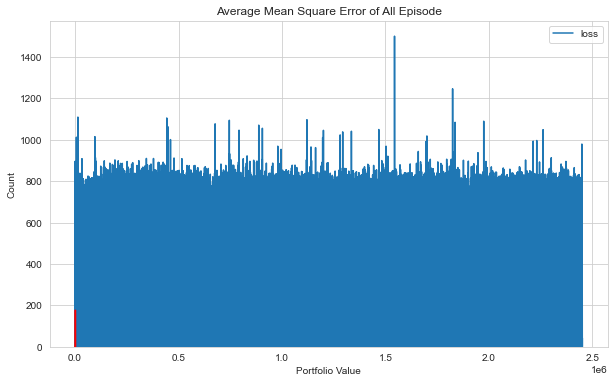

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

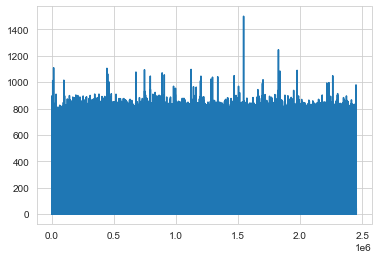

In [5]:
plt.plot(agent.model.losses)

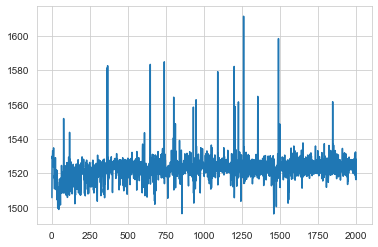

In [6]:
plt.plot(portfolio_value)

episode end value: 1244.32, duration: 0:00:00.112024
Sell: 383 times, Buy: 371 times


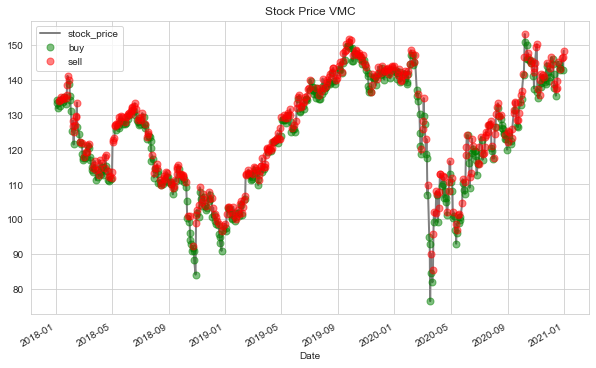

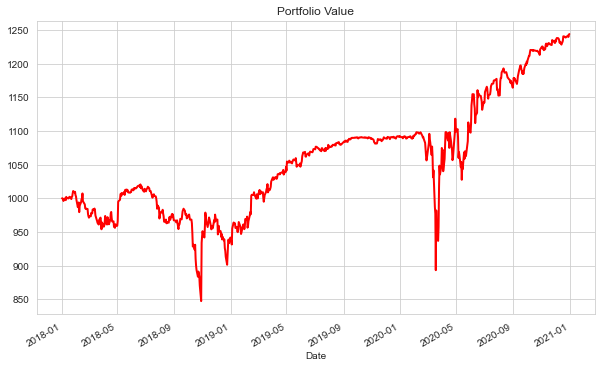

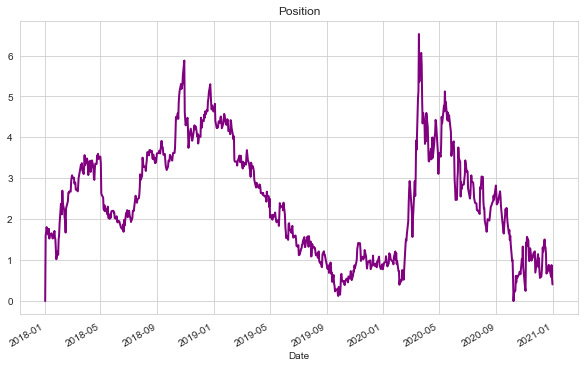

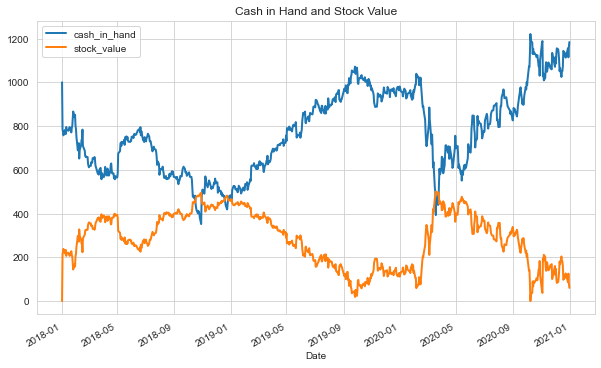

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: VMC
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.56 %
Volatility: 0.1542
shape ratio: 0.4189
Maximun drawdown: -18.67 %
Calmar ratio: 0.4048
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.99 %
Volatility (benchmark): 0.3824
shape ratio: 0.0757
Maximun drawdown: -49.47 %
Calmar ratio (benchmark): 0.0807


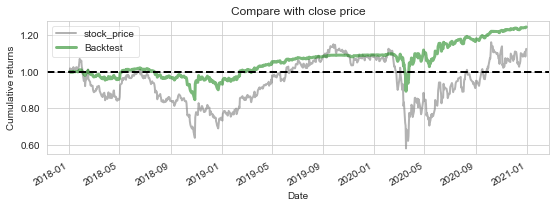

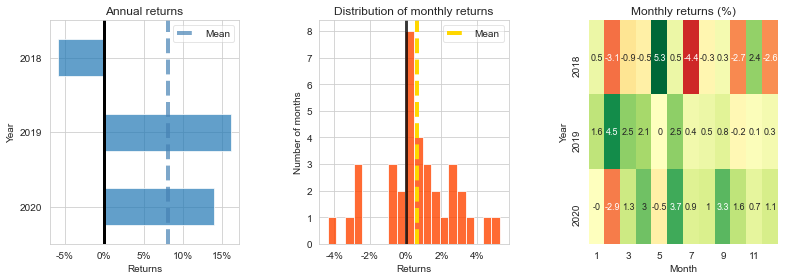

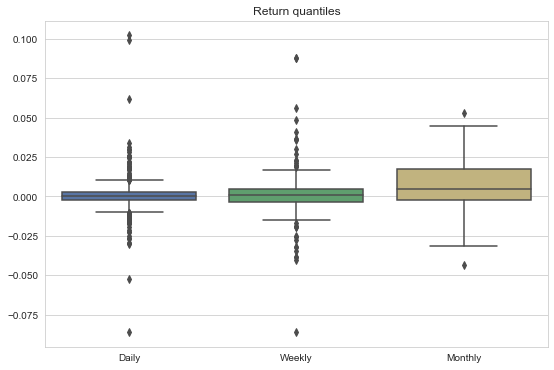

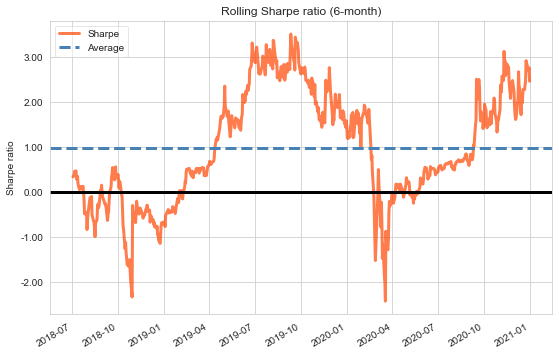

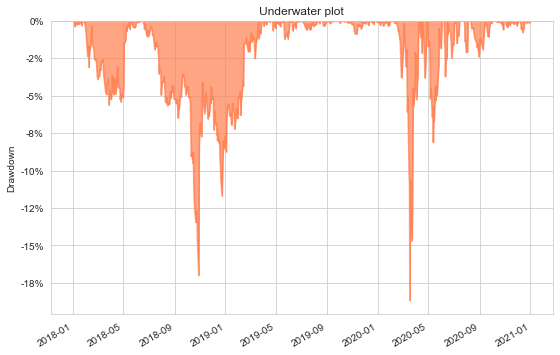

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')